In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housing=pd.read_excel("/content/housing+(1).xlsx")

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


 Question 1:-What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
Mean=housing['median_income'].mean() # calculation of mean of median_income

In [ ]:
print(round(Mean,2))   # round it to 2 decimal

3.87


In [ ]:
housing.median_income

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

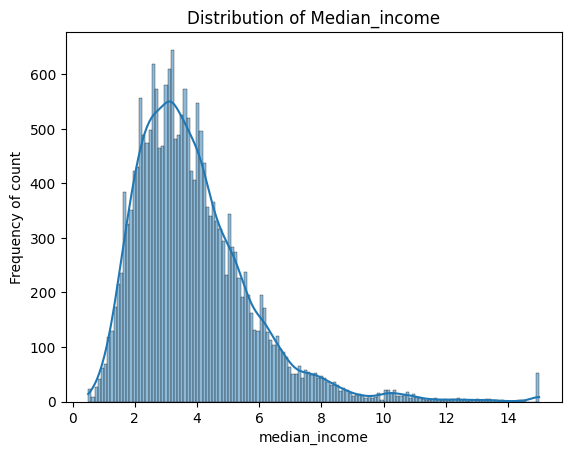

In [ ]:
import warnings                             #import warnings as this is distplot
warnings.filterwarnings("ignore")
sns.histplot(housing.median_income,bins=142,kde=True)         # makign graph using seaborn library
plt.title("Distribution of Median_income")  # Giving title name
plt.ylabel("Frequency of count")
plt.show()

# Displot states that this is right skewed data ,
#  means most of data falls/ distributed on left side means the person who have less income  are  more in number population wise

Question 2 :-Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

In [ ]:
housing.housing_median_age


0        41
1        21
2        52
3        52
4        52
         ..
20635    25
20636    18
20637    17
20638    18
20639    16
Name: housing_median_age, Length: 20640, dtype: int64

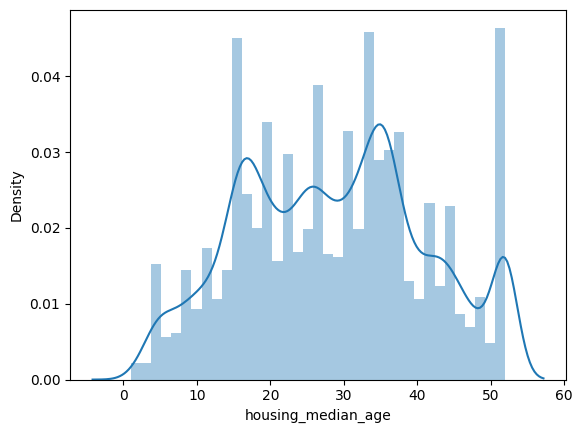

In [ ]:
sns.distplot(housing['housing_median_age']) # this is discrete data and distribution is somewhat bilateral distribution
plt.show()


Question 3:-   Show with the help of visualization, how median_income and median_house_values are related?



In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


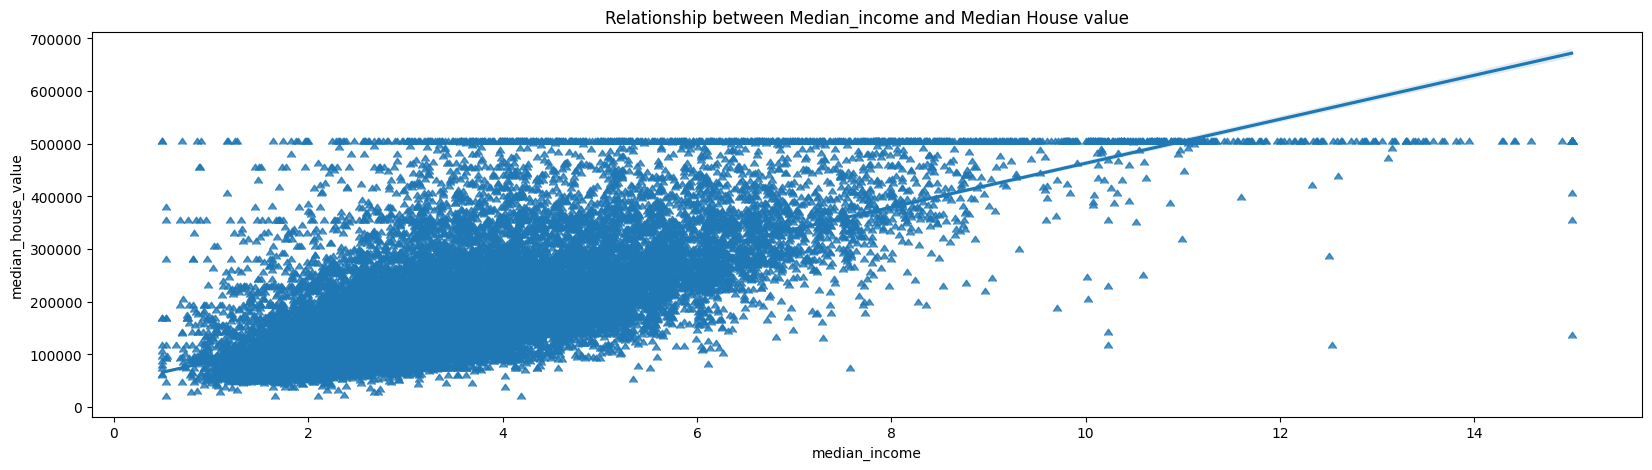

In [ ]:
plt.figure(figsize=(20,5))
plot=sns.regplot(x=housing['median_income'],y=housing['median_house_value'],marker=10)
plot.set(title="Relationship between Median_income and Median House value")
plt.show()

# when median_income increases then median_house value also increases there is positive correlation between both
# but there is huge variation

Question 4:- Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.

In [ ]:
housing.isnull().sum()   # to check how many null values


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing.dropna(inplace=True)# to drop null data inplace True means permanent


In [ ]:
housing.isnull().sum()          # Null Data removed

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Question 5:- Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.

In [ ]:
avg_value=housing.total_bedrooms.mean()    #mean of column total_bedroom calculated

In [ ]:
print(round(avg_value,2))                  #print avg value of total_bedroom

537.87


In [ ]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing.fillna(537.87,inplace=True)             # average value fill in all blank column permanently

In [ ]:
housing.isnull().sum()                           # result is zero blank columns means all blank values got filled

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Question:- 6
Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.

In [ ]:
def Median_value(data):    #Return the median of a list of numbers
    data.sort()
    middle = len(data) // 2
    if len(data) % 2 == 0:
        return (data[middle] + data[middle - 1]) / 2
    else:
      return data[middle]
l=[100,65,88,94,96,99,44,92,99,89,95]
print(Median_value(l))

94


Question 7:- Plot latitude versus longitude and explain your observations.

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


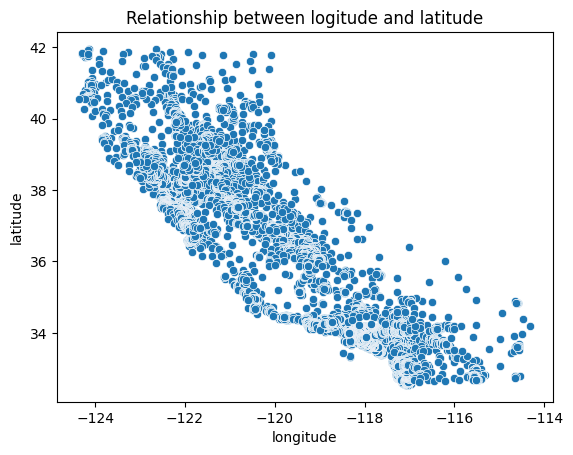

In [ ]:

rel=sns.scatterplot(x=housing.longitude,y=housing.latitude)
rel.set(title='Relationship between logitude and latitude')
plt.show()          # There is negative correlation between both variables

Question 8:-   Create a data set for which the ocean_proximity is ‘Near ocean’.

In [ ]:
Housing1=housing[(housing.ocean_proximity=='NEAR OCEAN')]      #filtering based on condition
print(Housing1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


Question 9:-   Find the mean and median of the median income for the data set created in question 8.


In [ ]:
#  1st method
round(Housing1.median_income.mean(),2)

4.01

In [ ]:
round(Housing1.median_income.median(),2)

3.65

In [ ]:
# 2nd method
Housing1.median_income.agg(["mean",'median'])    #using aggregate funtion

mean      4.005785
median    3.647050
Name: median_income, dtype: float64

Question 10:- Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
housing['total_bedroom_size']=['small' if total_bedrooms<=10 else
                               'medium' if 10< total_bedrooms <1000 else 'large' for total_bedrooms in housing['total_bedrooms']]

In [ ]:
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media